<a href="https://colab.research.google.com/github/ethanosaurus6/Proyek-Akhir-Jaringan-Saraf-Tiruan/blob/main/Pengaruh_Jumlah_Data_Latih_terhadap_Akurasi_Pengujian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stress-Lysis.csv to Stress-Lysis (7).csv


In [ ]:
df = pd.read_csv('Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [ ]:
import numpy as np

class LVQ:
    def __init__(self):
        # Inisialisasi atribut kelas LVQ
        # weights: array kosong untuk menyimpan bobot prototipe (representasi setiap kelas)
        # labels: array kosong untuk menyimpan label yang sesuai dengan bobot
        self.weights = np.array([])
        self.labels = np.array([])

    def train(self, training_data, target_labels, learning_rate, decay_factor, max_epochs):
        # Mendapatkan label unik dan indeks pertama dari masing-masing label dalam data latih
        unique_labels, initial_indices = np.unique(target_labels, return_index=True)

        # Menyimpan label unik sebagai representasi kelas
        self.labels = unique_labels

        # Inisialisasi bobot awal dengan data latih yang mewakili setiap label unik
        self.weights = training_data[initial_indices].astype(np.float64)

        # Menghapus data latih yang sudah dipakai sebagai bobot awal dari data latih
        training_data = np.delete(training_data, initial_indices, axis=0)
        target_labels = np.delete(target_labels, initial_indices, axis=0)

        epoch = 0  # Mengatur epoch awal
        while epoch < max_epochs:  # Looping hingga mencapai jumlah maksimum epoch
            for i, sample in enumerate(training_data):
                # Menghitung jarak Euclidean kuadrat antara sampel dan setiap bobot
                distances = [np.sum((weight - sample) ** 2) for weight in self.weights]

                # Menentukan indeks bobot prototipe terdekat
                closest_index = np.argmin(distances)

                # Menentukan tanda penyesuaian berdasarkan apakah label cocok
                adjustment_sign = 1 if target_labels[i] == self.labels[closest_index] else -1

                # Menyesuaikan bobot prototipe terdekat (mendekatkan atau menjauhkan)
                self.weights[closest_index] += adjustment_sign * learning_rate * (sample - self.weights[closest_index])

            # Mengurangi learning rate dengan faktor peluruhan
            learning_rate *= decay_factor

            # Menambah jumlah epoch
            epoch += 1

    def predict(self, input_data):
        # Inisialisasi daftar untuk menyimpan prediksi
        predictions = []

        for sample in input_data:  # Iterasi melalui setiap sampel dalam data masukan
            # Menghitung jarak Euclidean kuadrat antara sampel dan setiap bobot
            distances = [np.sum((weight - sample) ** 2) for weight in self.weights]

            # Menentukan label dari bobot prototipe terdekat dan menambahkannya ke prediksi
            predictions.append(self.labels[np.argmin(distances)])

        # Mengembalikan array prediksi
        return np.array(predictions)

In [ ]:
def calculate_accuracy(predicted_labels, true_labels):
    # Membandingkan setiap label prediksi dengan label sebenarnya
    # Jika cocok, tambahkan 1 ke daftar correct_predictions, jika tidak tambahkan 0
    correct_predictions = [1 if predicted_labels[i] == true_labels[i] else 0 for i in range(len(predicted_labels))]

    # Mengembalikan akurasi dengan membagi jumlah prediksi benar dengan total jumlah prediksi
    return sum(correct_predictions) / len(predicted_labels)

In [ ]:
# Pranormalisasi data
scaler = MinMaxScaler()
features = df[['Humidity', 'Temperature', 'Step count']]
scaled_features = scaler.fit_transform(features)

# Encoding target label
encoder = LabelEncoder()
target = encoder.fit_transform(df['Stress Level'])

# Membagi dataset menjadi data latih dan data uji , random_state=42
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2)

Training Size vs Accuracy: {10: 0.9551122194513717, 20: 0.9481296758104738, 40: 0.9476309226932669, 60: 0.9491271820448878, 80: 0.9351620947630922}


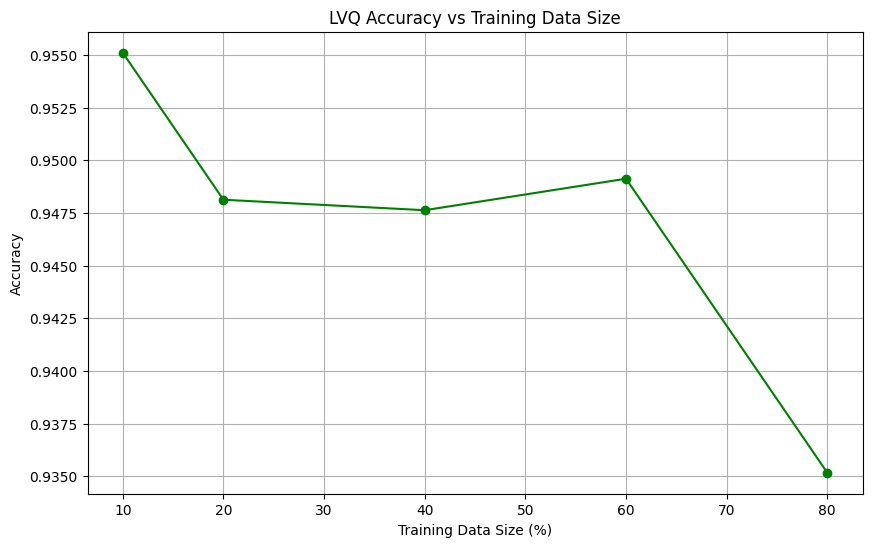

In [ ]:
# Initialize variables for training data sizes
training_sizes = [10, 20, 40, 60, 80]
accuracies_by_size = {}

# Perform testing for each training data size
for size in training_sizes:
    trial_accuracies = []
    for _ in range(5):  # Run 5 trials to average the accuracy
        X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, train_size=size/100)

        lvq = LVQ()
        lvq.train(X_train, y_train, learning_rate=0.3, decay_factor=0.8, max_epochs=100)
        predictions = lvq.predict(X_test)
        accuracy = calculate_accuracy(predictions, y_test)
        trial_accuracies.append(accuracy)

    # Store average accuracy for this training size
    accuracies_by_size[size] = np.mean(trial_accuracies)

print(f"Training Size vs Accuracy: {accuracies_by_size}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, list(accuracies_by_size.values()), marker='o', linestyle='-', color='g')
plt.title('LVQ Accuracy vs Training Data Size')
plt.xlabel('Training Data Size (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()